# COVID-19 Exploratory Data Analysis

# Import neccesory Packages

In [35]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Load Datasets

In [36]:
data_covid = pd.read_csv('covid_19_clean_complete.csv')
data_country = pd.read_csv('country_wise_latest.csv')
data_day = pd.read_csv('day_wise.csv')
data_fgroup = pd.read_csv('full_grouped.csv')
data_world = pd.read_csv('worldometer_data.csv')

In [37]:
all_data = [data_covid, data_country, data_day, data_fgroup, data_world]

for data in all_data:
    print(f"----------{data.head()}----------\n\n\n")
    print()

----------  Province/State Country/Region       Lat       Long        Date  Confirmed  \
0            NaN    Afghanistan  33.93911  67.709953  2020-01-22          0   
1            NaN        Albania  41.15330  20.168300  2020-01-22          0   
2            NaN        Algeria  28.03390   1.659600  2020-01-22          0   
3            NaN        Andorra  42.50630   1.521800  2020-01-22          0   
4            NaN         Angola -11.20270  17.873900  2020-01-22          0   

   Deaths  Recovered  Active             WHO Region  
0       0          0       0  Eastern Mediterranean  
1       0          0       0                 Europe  
2       0          0       0                 Africa  
3       0          0       0                 Europe  
4       0          0       0                 Africa  ----------




----------  Country/Region  Confirmed  Deaths  Recovered  Active  New cases  New deaths  \
0    Afghanistan      36263    1269      25198    9796        106          10   
1    

# Finding And Handling Null Values

In [38]:
data_covid.shape

(49068, 10)

In [39]:
data_covid.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 49068 entries, 0 to 49067
Data columns (total 10 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Province/State  14664 non-null  object 
 1   Country/Region  49068 non-null  object 
 2   Lat             49068 non-null  float64
 3   Long            49068 non-null  float64
 4   Date            49068 non-null  object 
 5   Confirmed       49068 non-null  int64  
 6   Deaths          49068 non-null  int64  
 7   Recovered       49068 non-null  int64  
 8   Active          49068 non-null  int64  
 9   WHO Region      49068 non-null  object 
dtypes: float64(2), int64(4), object(4)
memory usage: 3.7+ MB


In [40]:
data_covid.describe()

,Lat,Long,Confirmed,Deaths,Recovered,Active
count,49068.000000,49068.000000,4.906800e+04,49068.000000,4.906800e+04,4.906800e+04
mean,21.433730,23.528236,1.688490e+04,884.179160,7.915713e+03,8.085012e+03
std,24.950320,70.442740,1.273002e+05,6313.584411,5.480092e+04,7.625890e+04
min,-51.796300,-135.000000,0.000000e+00,0.000000,0.000000e+00,-1.400000e+01
25%,7.873054,-15.310100,4.000000e+00,0.000000,0.000000e+00,0.000000e+00
50%,23.634500,21.745300,1.680000e+02,2.000000,2.900000e+01,2.600000e+01
75%,41.204380,80.771797,1.518250e+03,30.000000,6.660000e+02,6.060000e+02
max,71.706900,178.065000,4.290259e+06,148011.000000,1.846641e+06,2.816444e+06


In [41]:
data_covid.isnull().sum()

Province/State    34404
Country/Region        0
Lat                   0
Long                  0
Date                  0
Confirmed             0
Deaths                0
Recovered             0
Active                0
WHO Region            0
dtype: int64

In [42]:
data_covid['Province/State'] = data_covid['Province/State'].fillna(' ')

In [43]:
data_covid.isnull().sum()

Province/State    0
Country/Region    0
Lat               0
Long              0
Date              0
Confirmed         0
Deaths            0
Recovered         0
Active            0
WHO Region        0
dtype: int64

In [44]:
data_country.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 187 entries, 0 to 186
Data columns (total 15 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   Country/Region          187 non-null    object 
 1   Confirmed               187 non-null    int64  
 2   Deaths                  187 non-null    int64  
 3   Recovered               187 non-null    int64  
 4   Active                  187 non-null    int64  
 5   New cases               187 non-null    int64  
 6   New deaths              187 non-null    int64  
 7   New recovered           187 non-null    int64  
 8   Deaths / 100 Cases      187 non-null    float64
 9   Recovered / 100 Cases   187 non-null    float64
 10  Deaths / 100 Recovered  187 non-null    float64
 11  Confirmed last week     187 non-null    int64  
 12  1 week change           187 non-null    int64  
 13  1 week % increase       187 non-null    float64
 14  WHO Region              187 non-null    ob

In [45]:
data_country.describe()

c:\Users\Admin\AppData\Local\Programs\Python\Python312\Lib\site-packages\pandas\core\nanops.py:1016: RuntimeWarning: invalid value encountered in subtract
  sqr = _ensure_numeric((avg - values) ** 2)


,Confirmed,Deaths,Recovered,Active,New cases,New deaths,New recovered,Deaths / 100 Cases,Recovered / 100 Cases,Deaths / 100 Recovered,Confirmed last week,1 week change,1 week % increase
count,1.870000e+02,187.000000,1.870000e+02,1.870000e+02,187.000000,187.000000,187.000000,187.000000,187.000000,187.00,1.870000e+02,187.000000,187.000000
mean,8.813094e+04,3497.518717,5.063148e+04,3.400194e+04,1222.957219,28.957219,933.812834,3.019519,64.820535,inf,7.868248e+04,9448.459893,13.606203
std,3.833187e+05,14100.002482,1.901882e+05,2.133262e+05,5710.374790,120.037173,4197.719635,3.454302,26.287694,NaN,3.382737e+05,47491.127684,24.509838
min,1.000000e+01,0.000000,0.000000e+00,0.000000e+00,0.000000,0.000000,0.000000,0.000000,0.000000,0.00,1.000000e+01,-47.000000,-3.840000
25%,1.114000e+03,18.500000,6.265000e+02,1.415000e+02,4.000000,0.000000,0.000000,0.945000,48.770000,1.45,1.051500e+03,49.000000,2.775000
50%,5.059000e+03,108.000000,2.815000e+03,1.600000e+03,49.000000,1.000000,22.000000,2.150000,71.320000,3.62,5.020000e+03,432.000000,6.890000
75%,4.046050e+04,734.000000,2.260600e+04,9.149000e+03,419.500000,6.000000,221.000000,3.875000,86.885000,6.44,3.708050e+04,3172.000000,16.855000
max,4.290259e+06,148011.000000,1.846641e+06,2.816444e+06,56336.000000,1076.000000,33728.000000,28.560000,100.000000,inf,3.834677e+06,455582.000000,226.320000


In [46]:
data_country.isnull().sum()

Country/Region            0
Confirmed                 0
Deaths                    0
Recovered                 0
Active                    0
New cases                 0
New deaths                0
New recovered             0
Deaths / 100 Cases        0
Recovered / 100 Cases     0
Deaths / 100 Recovered    0
Confirmed last week       0
1 week change             0
1 week % increase         0
WHO Region                0
dtype: int64

In [47]:
data_day.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 188 entries, 0 to 187
Data columns (total 12 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   Date                    188 non-null    object 
 1   Confirmed               188 non-null    int64  
 2   Deaths                  188 non-null    int64  
 3   Recovered               188 non-null    int64  
 4   Active                  188 non-null    int64  
 5   New cases               188 non-null    int64  
 6   New deaths              188 non-null    int64  
 7   New recovered           188 non-null    int64  
 8   Deaths / 100 Cases      188 non-null    float64
 9   Recovered / 100 Cases   188 non-null    float64
 10  Deaths / 100 Recovered  188 non-null    float64
 11  No. of countries        188 non-null    int64  
dtypes: float64(3), int64(8), object(1)
memory usage: 17.8+ KB


In [48]:
data_day.isnull().sum()

Date                      0
Confirmed                 0
Deaths                    0
Recovered                 0
Active                    0
New cases                 0
New deaths                0
New recovered             0
Deaths / 100 Cases        0
Recovered / 100 Cases     0
Deaths / 100 Recovered    0
No. of countries          0
dtype: int64

In [49]:
data_fgroup.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 35156 entries, 0 to 35155
Data columns (total 10 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   Date            35156 non-null  object
 1   Country/Region  35156 non-null  object
 2   Confirmed       35156 non-null  int64 
 3   Deaths          35156 non-null  int64 
 4   Recovered       35156 non-null  int64 
 5   Active          35156 non-null  int64 
 6   New cases       35156 non-null  int64 
 7   New deaths      35156 non-null  int64 
 8   New recovered   35156 non-null  int64 
 9   WHO Region      35156 non-null  object
dtypes: int64(7), object(3)
memory usage: 2.7+ MB


In [50]:
data_fgroup.isnull().sum()

Date              0
Country/Region    0
Confirmed         0
Deaths            0
Recovered         0
Active            0
New cases         0
New deaths        0
New recovered     0
WHO Region        0
dtype: int64

In [51]:
data_world.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 209 entries, 0 to 208
Data columns (total 16 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   Country/Region    209 non-null    object 
 1   Continent         208 non-null    object 
 2   Population        208 non-null    float64
 3   TotalCases        209 non-null    int64  
 4   NewCases          4 non-null      float64
 5   TotalDeaths       188 non-null    float64
 6   NewDeaths         3 non-null      float64
 7   TotalRecovered    205 non-null    float64
 8   NewRecovered      3 non-null      float64
 9   ActiveCases       205 non-null    float64
 10  Serious,Critical  122 non-null    float64
 11  Tot Cases/1M pop  208 non-null    float64
 12  Deaths/1M pop     187 non-null    float64
 13  TotalTests        191 non-null    float64
 14  Tests/1M pop      191 non-null    float64
 15  WHO Region        184 non-null    object 
dtypes: float64(12), int64(1), object(3)
memory u

In [52]:
data_world.isnull().sum()

Country/Region        0
Continent             1
Population            1
TotalCases            0
NewCases            205
TotalDeaths          21
NewDeaths           206
TotalRecovered        4
NewRecovered        206
ActiveCases           4
Serious,Critical     87
Tot Cases/1M pop      1
Deaths/1M pop        22
TotalTests           18
Tests/1M pop         18
WHO Region           25
dtype: int64

In [53]:
data_world.head()

,Country/Region,Continent,Population,TotalCases,NewCases,TotalDeaths,NewDeaths,TotalRecovered,NewRecovered,ActiveCases,"Serious,Critical",Tot Cases/1M pop,Deaths/1M pop,TotalTests,Tests/1M pop,WHO Region
0,USA,North America,3.311981e+08,5032179,NaN,162804.0,NaN,2576668.0,NaN,2292707.0,18296.0,15194.0,492.0,63139605.0,190640.0,Americas
1,Brazil,South America,2.127107e+08,2917562,NaN,98644.0,NaN,2047660.0,NaN,771258.0,8318.0,13716.0,464.0,13206188.0,62085.0,Americas
2,India,Asia,1.381345e+09,2025409,NaN,41638.0,NaN,1377384.0,NaN,606387.0,8944.0,1466.0,30.0,22149351.0,16035.0,South-EastAsia
3,Russia,Europe,1.459409e+08,871894,NaN,14606.0,NaN,676357.0,NaN,180931.0,2300.0,5974.0,100.0,29716907.0,203623.0,Europe
4,South Africa,Africa,5.938157e+07,538184,NaN,9604.0,NaN,387316.0,NaN,141264.0,539.0,9063.0,162.0,3149807.0,53044.0,Africa


In [54]:
num_column = ['Population', 'NewCases', 'TotalDeaths', 'NewDeaths', 'Tot Cases/1M pop', 'TotalRecovered', 'NewRecovered', 'ActiveCases', 'Serious,Critical', 'Tests/1M pop', 'Deaths/1M pop', 'TotalTests']
data_world[num_column] = data_world[num_column].fillna(0)

In [55]:
data_world['WHO Region'] = data_world['WHO Region'].fillna(' ')
data_world['Continent'] = data_world['Continent'].fillna(' ')

In [56]:
data_world.isnull().sum()

Country/Region      0
Continent           0
Population          0
TotalCases          0
NewCases            0
TotalDeaths         0
NewDeaths           0
TotalRecovered      0
NewRecovered        0
ActiveCases         0
Serious,Critical    0
Tot Cases/1M pop    0
Deaths/1M pop       0
TotalTests          0
Tests/1M pop        0
WHO Region          0
dtype: int64

In [57]:
data_covid.drop('Province/State',axis=1,inplace=True)

In [58]:
data_covid.head()

,Country/Region,Lat,Long,Date,Confirmed,Deaths,Recovered,Active,WHO Region
0,Afghanistan,33.93911,67.709953,2020-01-22,0,0,0,0,Eastern Mediterranean
1,Albania,41.15330,20.168300,2020-01-22,0,0,0,0,Europe
2,Algeria,28.03390,1.659600,2020-01-22,0,0,0,0,Africa
3,Andorra,42.50630,1.521800,2020-01-22,0,0,0,0,Europe
4,Angola,-11.20270,17.873900,2020-01-22,0,0,0,0,Africa


# Create a new Dataset GroupBy Country/Region Columns and Add Aggregate Columns

In [59]:
covid_metrics = data_covid.groupby('Country/Region').agg(total_cases = ('Confirmed',sum), total_deaths = ('Deaths',sum),total_recovered = ('Recovered',sum), active_cases = ('Active',sum)).reset_index()
covid_metrics.head()

C:\Users\Admin\AppData\Local\Temp\ipykernel_24148\1951647100.py:1: FutureWarning: The provided callable <built-in function sum> is currently using SeriesGroupBy.sum. In a future version of pandas, the provided callable will be used directly. To keep current behavior pass the string "sum" instead.
  covid_metrics = data_covid.groupby('Country/Region').agg(total_cases = ('Confirmed',sum), total_deaths = ('Deaths',sum),total_recovered = ('Recovered',sum), active_cases = ('Active',sum)).reset_index()
C:\Users\Admin\AppData\Local\Temp\ipykernel_24148\1951647100.py:1: FutureWarning: The provided callable <built-in function sum> is currently using SeriesGroupBy.sum. In a future version of pandas, the provided callable will be used directly. To keep current behavior pass the string "sum" instead.
  covid_metrics = data_covid.groupby('Country/Region').agg(total_cases = ('Confirmed',sum), total_deaths = ('Deaths',sum),total_recovered = ('Recovered',sum), active_cases = ('Active',sum)).reset_inde

,Country/Region,total_cases,total_deaths,total_recovered,active_cases
0,Afghanistan,1936390,49098,798240,1089052
1,Albania,196702,5708,118877,72117
2,Algeria,1179755,77972,755897,345886
3,Andorra,94404,5423,69074,19907
4,Angola,22662,1078,6573,15011


# Add a Recovery rate and Death rate columns

In [60]:
covid_metrics['recovery_rate'] = (covid_metrics['total_recovered']/covid_metrics['total_cases'])*100
covid_metrics['death_rate'] = (covid_metrics['total_deaths']/covid_metrics['total_cases'])*100
covid_metrics.head()

,Country/Region,total_cases,total_deaths,total_recovered,active_cases,recovery_rate,death_rate
0,Afghanistan,1936390,49098,798240,1089052,41.223101,2.535543
1,Albania,196702,5708,118877,72117,60.435074,2.901852
2,Algeria,1179755,77972,755897,345886,64.072371,6.609169
3,Andorra,94404,5423,69074,19907,73.168510,5.744460
4,Angola,22662,1078,6573,15011,29.004501,4.756862


# Create a new Dataset GroupBy WHO Region and Date Columns and Add Aggregate Columns

In [61]:
region_data = data_covid.groupby(['WHO Region','Date']).agg(total_cases = ('Confirmed',sum), total_deaths = ('Deaths',sum),total_recovered = ('Recovered',sum), active_cases = ('Active',sum)).reset_index()
region_data.tail()

C:\Users\Admin\AppData\Local\Temp\ipykernel_24148\925965174.py:1: FutureWarning: The provided callable <built-in function sum> is currently using SeriesGroupBy.sum. In a future version of pandas, the provided callable will be used directly. To keep current behavior pass the string "sum" instead.
  region_data = data_covid.groupby(['WHO Region','Date']).agg(total_cases = ('Confirmed',sum), total_deaths = ('Deaths',sum),total_recovered = ('Recovered',sum), active_cases = ('Active',sum)).reset_index()
C:\Users\Admin\AppData\Local\Temp\ipykernel_24148\925965174.py:1: FutureWarning: The provided callable <built-in function sum> is currently using SeriesGroupBy.sum. In a future version of pandas, the provided callable will be used directly. To keep current behavior pass the string "sum" instead.
  region_data = data_covid.groupby(['WHO Region','Date']).agg(total_cases = ('Confirmed',sum), total_deaths = ('Deaths',sum),total_recovered = ('Recovered',sum), active_cases = ('Active',sum)).reset_

,WHO Region,Date,total_cases,total_deaths,total_recovered,active_cases
1123,Western Pacific,2020-07-23,277192,8131,202006,67055
1124,Western Pacific,2020-07-24,280946,8148,202837,69961
1125,Western Pacific,2020-07-25,284973,8180,204749,72044
1126,Western Pacific,2020-07-26,289139,8225,205643,75271
1127,Western Pacific,2020-07-27,292428,8249,206770,77409


# Add a Recovery rate and Death rate columns

In [62]:
region_data['recovery_rate'] = (region_data['total_recovered']/region_data['total_cases'])*100
region_data['death_rate'] = (region_data['total_deaths']/region_data['total_cases'])*100
region_data.head()

,WHO Region,Date,total_cases,total_deaths,total_recovered,active_cases,recovery_rate,death_rate
0,Africa,2020-01-22,0,0,0,0,NaN,NaN
1,Africa,2020-01-23,0,0,0,0,NaN,NaN
2,Africa,2020-01-24,0,0,0,0,NaN,NaN
3,Africa,2020-01-25,0,0,0,0,NaN,NaN
4,Africa,2020-01-26,0,0,0,0,NaN,NaN


# Finding and Handling Null values for New Datasets

In [63]:
covid_metrics.isnull().sum()

Country/Region     0
total_cases        0
total_deaths       0
total_recovered    0
active_cases       0
recovery_rate      0
death_rate         0
dtype: int64

In [64]:
region_data.isnull().sum()

WHO Region          0
Date                0
total_cases         0
total_deaths        0
total_recovered     0
active_cases        0
recovery_rate      43
death_rate         43
dtype: int64

In [65]:
region_data = region_data.fillna(0)
region_data.head()

,WHO Region,Date,total_cases,total_deaths,total_recovered,active_cases,recovery_rate,death_rate
0,Africa,2020-01-22,0,0,0,0,0.0,0.0
1,Africa,2020-01-23,0,0,0,0,0.0,0.0
2,Africa,2020-01-24,0,0,0,0,0.0,0.0
3,Africa,2020-01-25,0,0,0,0,0.0,0.0
4,Africa,2020-01-26,0,0,0,0,0.0,0.0


# Extracting Month from Date Column

In [66]:
region_data['Date'] = pd.to_datetime(region_data['Date'])
region_data['Month'] = region_data['Date'].dt.month

# Visualization

# Line charts for the progression of cases over time

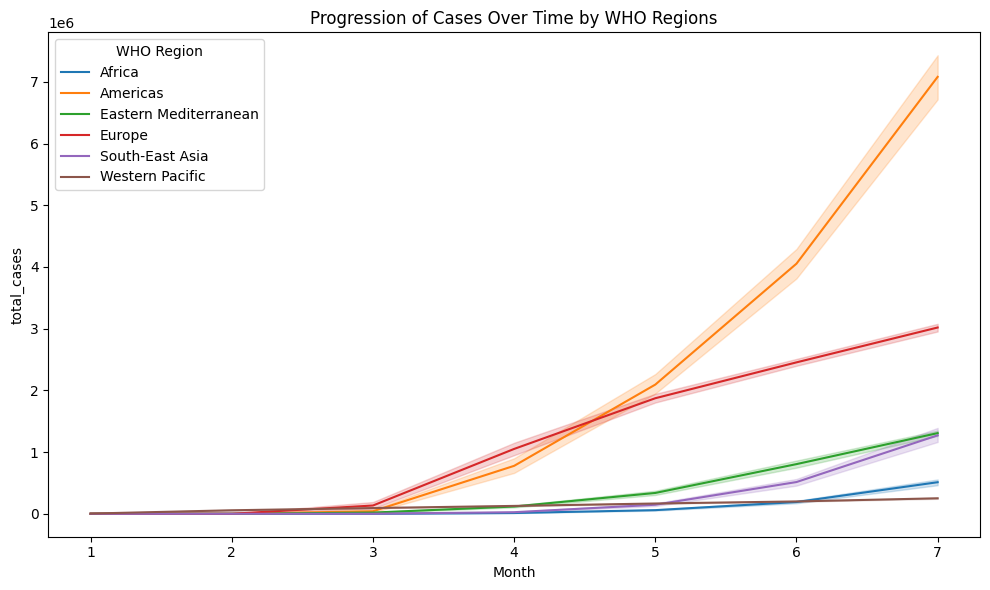

In [67]:
plt.figure(figsize=(10,6))
sns.lineplot(data= region_data, x='Month', y= 'total_cases', hue= 'WHO Region')
plt.title('Progression of Cases Over Time by WHO Regions')
plt.tight_layout()
plt.show()

# Bar charts comparing case counts, deaths, and recovery rates by country/region

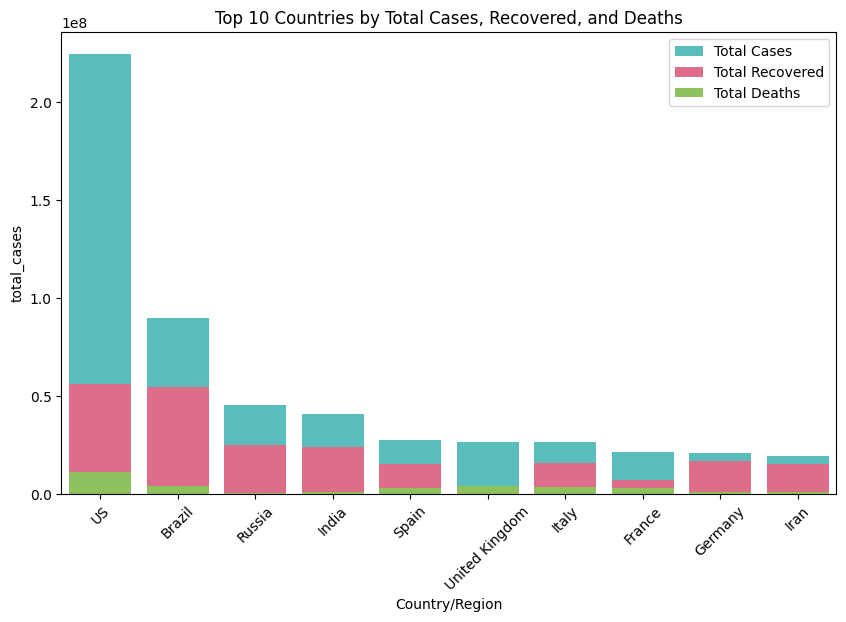

In [68]:
top_countries = covid_metrics.sort_values(by= 'total_cases', ascending= False).head(10)

plt.figure(figsize=(10,6))
sns.barplot(data = top_countries, x= 'Country/Region', y= 'total_cases', color= '#48CFCB', label= 'Total Cases')
sns.barplot(data = top_countries, x= 'Country/Region', y= 'total_recovered', color= '#F05A7E', label= 'Total Recovered')
sns.barplot(data = top_countries, x= 'Country/Region', y= 'total_deaths', color= '#8FD14F', label= 'Total Deaths')
plt.title('Top 10 Countries by Total Cases, Recovered, and Deaths')
plt.xticks(rotation = 45)
plt.legend()
plt.show()

# Heatmap of case density by region

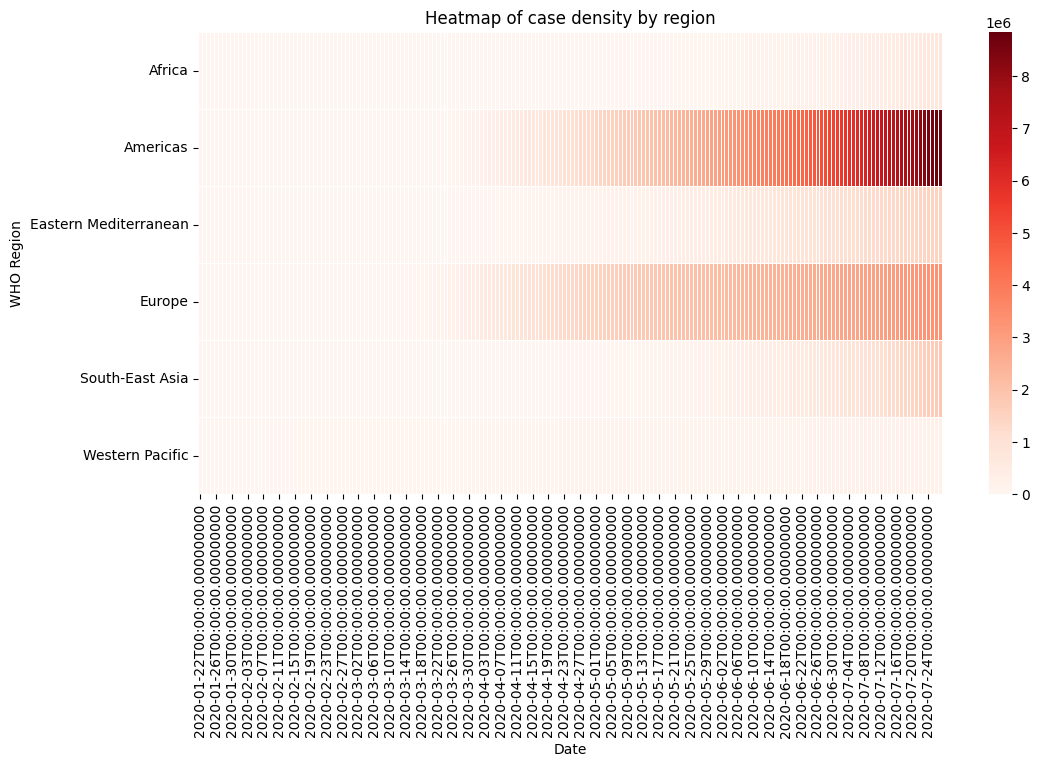

In [69]:
region_case_density = region_data.pivot(index= 'Date', columns = 'WHO Region', values = 'total_cases')

plt.figure(figsize=(12,6))
sns.heatmap(region_case_density.T, cmap='Reds', linewidths=0.5)
plt.title('Heatmap of case density by region')
plt.show()

# Rolling Averages of Daily Cases

In [70]:
region_data['rolling_avg'] = region_data.groupby('WHO Region')['total_cases'].transform(lambda x: x.rolling(window =7).mean())


In [71]:
region_data.isnull().sum()

WHO Region          0
Date                0
total_cases         0
total_deaths        0
total_recovered     0
active_cases        0
recovery_rate       0
death_rate          0
Month               0
rolling_avg        36
dtype: int64

In [72]:
region_data['rolling_avg'] = region_data['rolling_avg'].fillna(0)

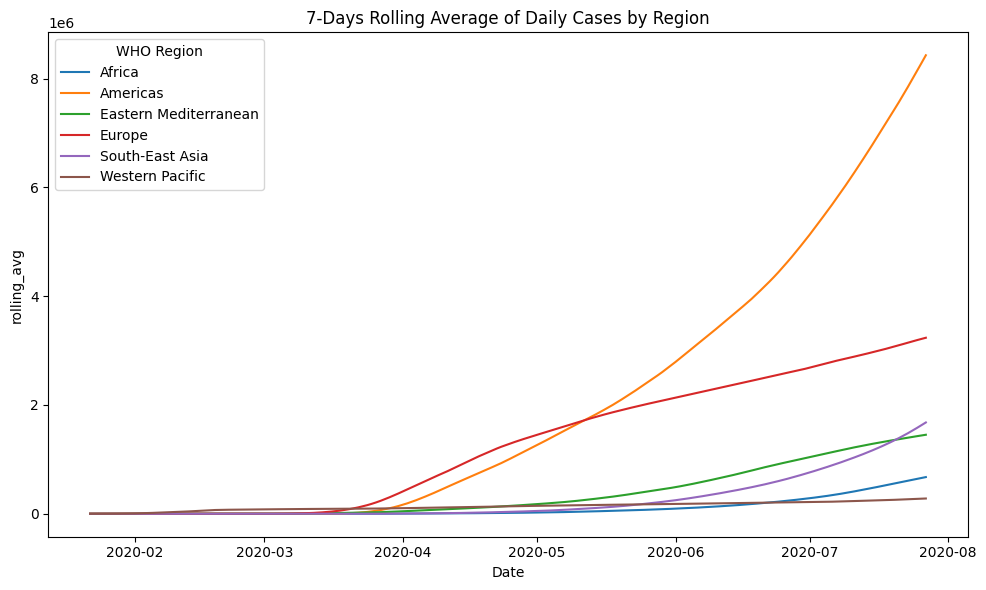

In [73]:
plt.figure(figsize=(10,6))
sns.lineplot(data = region_data, x='Date', y='rolling_avg', hue='WHO Region')
plt.title('7-Days Rolling Average of Daily Cases by Region')
plt.tight_layout()
plt.show()

# Export the dataset to csv for use in Tableau

In [74]:
covid_metrics.to_csv('covid_metrics.csv', index= False)

In [75]:
data_covid.to_csv('covid_data.csv', index= False)

In [76]:
region_data.to_csv('region_data.csv', index= False)